<u>IMPORTS</u>

In [44]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import astropy.constants as c 
import astropy.units as u
from scipy.misc import derivative
from scipy.interpolate import griddata

%run PS4Q2Funcs.ipynb

<u>DEFINITIONS</u>

In [45]:
Temp = np.logspace(3, 4, 100)                              #Temperature range constrained
Pressure = np.logspace(3.5, 9, 100)                        #Pressure range constrained

#Matrix definitions:
xh1 = np.full((len(Pressure), len(Temp)), np.nan)          #HI ionization fraction
xh11 = np.full((len(Pressure), len(Temp)), np.nan)         #HII ionization fraction
h2entropy = np.full((len(Pressure), len(Temp)), np.nan)    #H2 specific entropy
hIentropy = np.full((len(Pressure), len(Temp)), np.nan)    #HI specific entropy
hIIentropy = np.full((len(Pressure), len(Temp)), np.nan)   #HII specific entropy
mix_entropy = np.full((len(Pressure), len(Temp)), np.nan)  #Specific entropy of mixing
tot_entropy = np.full((len(Pressure), len(Temp)), np.nan)  #Total entropy

## QUESTION 2.2

<u>Computing $x_{HI}$ over T and P ranges</u>

In [47]:
for indexP, P in enumerate(Pressure):
    for indexT, T in enumerate(Temp):
        xh1[indexP, indexT] = ion_frac(T, P)

xh1

array([[6.43938670e-08, 1.16868516e-07, 2.09285391e-07, ...,
        9.99999419e-01, 9.99999493e-01, 9.99999557e-01],
       [6.04041434e-08, 1.09627561e-07, 1.96318460e-07, ...,
        9.99999339e-01, 9.99999424e-01, 9.99999497e-01],
       [5.66616155e-08, 1.02835243e-07, 1.84154936e-07, ...,
        9.99999249e-01, 9.99999345e-01, 9.99999428e-01],
       ...,
       [1.30136786e-10, 2.36185434e-10, 4.22955342e-10, ...,
        8.87713093e-01, 8.99485643e-01, 9.10032181e-01],
       [1.22073753e-10, 2.21551826e-10, 3.96749819e-10, ...,
        8.75793827e-01, 8.88533822e-01, 8.99997312e-01],
       [1.14510292e-10, 2.07824888e-10, 3.72167941e-10, ...,
        8.62953064e-01, 8.76680129e-01, 8.89088866e-01]], shape=(100, 100))

## QUESTION 2.3

<u>Computing $x_{HII}$ over T and P ranges</u>

In [48]:
for indexP, P in enumerate(Pressure):
    for indexT, T in enumerate(Temp):
        xh11[indexP, indexT] = ion_hII(T,P)

xh11


array([[3.10092336e-33, 1.95883277e-32, 1.18683486e-31, ...,
        2.20011113e-01, 2.65734398e-01, 3.17519709e-01],
       [2.90879593e-33, 1.83746715e-32, 1.11330079e-31, ...,
        2.07966934e-01, 2.51649430e-01, 3.01353704e-01],
       [2.72857237e-33, 1.72362112e-32, 1.04432275e-31, ...,
        1.96494019e-01, 2.38180485e-01, 2.85821266e-01],
       ...,
       [6.26681087e-36, 3.95870297e-35, 2.39853384e-34, ...,
        5.03432557e-04, 6.26727605e-04, 7.76805822e-04],
       [5.87853096e-36, 3.71342912e-35, 2.24992516e-34, ...,
        4.72248183e-04, 5.87908150e-04, 7.28693926e-04],
       [5.51430816e-36, 3.48335199e-35, 2.11052400e-34, ...,
        4.42995049e-04, 5.51492506e-04, 6.83560847e-04]], shape=(100, 100))

## QUESTION 2.4

<u>Computing specific entropy for $H_{2}$</u>


In [49]:
for indexP, P in enumerate(Pressure):
    for indexT, T in enumerate(Temp):
        f_h2 = f_h2_noconst(P, xh1[indexP, indexT])
        h2entropy[indexP, indexT] = float(derivative(f_h2, T))
        
h2entropy

/var/folders/bh/ph3t25_s225g7tsmf91j29w80000gn/T/ipykernel_42165/811701088.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  h2entropy[indexP, indexT] = float(derivative(f_h2, T))


array([[1.02110122e+09, 1.02647969e+09, 1.03181849e+09, ...,
        2.06050638e+09, 2.07064750e+09, 2.08069206e+09],
       [1.01581336e+09, 1.02119183e+09, 1.02653063e+09, ...,
        2.04992701e+09, 2.06007200e+09, 2.07011736e+09],
       [1.01052550e+09, 1.01590397e+09, 1.02124276e+09, ...,
        2.03934852e+09, 2.04948956e+09, 2.05953266e+09],
       ...,
       [5.08178734e+08, 5.13557203e+08, 5.18895998e+08, ...,
        1.04446687e+09, 1.05350780e+09, 1.06256178e+09],
       [5.02890874e+08, 5.08269342e+08, 5.13608137e+08, ...,
        1.03500872e+09, 1.04394486e+09, 1.05290276e+09],
       [4.97603013e+08, 5.02981482e+08, 5.08320277e+08, ...,
        1.02565412e+09, 1.03447949e+09, 1.04333521e+09]], shape=(100, 100))

<u>Computing specific entropy for $HI$</u>

In [50]:
for indexP, P in enumerate(Pressure):
    for indexT, T in enumerate(Temp):
        f_hI = f_hI_noconst(P, xh1[indexP, indexT])
        hIentropy[indexP, indexT] = float(derivative(f_hI, T))
        
hIentropy

/var/folders/bh/ph3t25_s225g7tsmf91j29w80000gn/T/ipykernel_42165/1290487936.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  hIentropy[indexP, indexT] = float(derivative(f_hI, T))


array([[3.29265828e+09, 3.24818939e+09, 3.20482683e+09, ...,
        2.39067412e+09, 2.39575800e+09, 2.40094812e+09],
       [3.28737042e+09, 3.24290153e+09, 3.19953896e+09, ...,
        2.38009841e+09, 2.38518229e+09, 2.39037241e+09],
       [3.28208256e+09, 3.23761367e+09, 3.19425110e+09, ...,
        2.36945657e+09, 2.37451205e+09, 2.37966277e+09],
       ...,
       [2.77973579e+09, 2.73526691e+09, 2.69190434e+09, ...,
        1.37404677e+09, 1.37777204e+09, 1.38162483e+09],
       [2.77444793e+09, 2.72997904e+09, 2.68661648e+09, ...,
        1.36458862e+09, 1.36820910e+09, 1.37196580e+09],
       [2.76916007e+09, 2.72469118e+09, 2.68132862e+09, ...,
        1.35523402e+09, 1.35874373e+09, 1.36239825e+09]], shape=(100, 100))

<u>Computing specific entropy for $HII$</u>

In [51]:
for indexP, P in enumerate(Pressure):
    for indexT, T in enumerate(Temp):
        f_hII = f_hII_noconst(P, xh11[indexP, indexT])
        hIIentropy[indexP, indexT] = float(derivative(f_hII, T))
        
hIIentropy

/var/folders/bh/ph3t25_s225g7tsmf91j29w80000gn/T/ipykernel_42165/1833682877.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  hIIentropy[indexP, indexT] = float(derivative(f_hII, T))


array([[8.04240807e+09, 7.89505979e+09, 7.75115422e+09, ...,
        2.45423227e+09, 2.44344599e+09, 2.43354925e+09],
       [8.03712850e+09, 7.88978022e+09, 7.74587465e+09, ...,
        2.44832027e+09, 2.43738222e+09, 2.42730346e+09],
       [8.03184893e+09, 7.88450064e+09, 7.74059507e+09, ...,
        2.44244526e+09, 2.43136367e+09, 2.42111238e+09],
       ...,
       [7.53028963e+09, 7.38294134e+09, 7.23903577e+09, ...,
        1.93186153e+09, 1.91857886e+09, 1.90565806e+09],
       [7.52501005e+09, 7.37766177e+09, 7.23375620e+09, ...,
        1.92658067e+09, 1.91329769e+09, 1.90037650e+09],
       [7.51973048e+09, 7.37238220e+09, 7.22847663e+09, ...,
        1.92129989e+09, 1.90801661e+09, 1.89509506e+09]], shape=(100, 100))

## QUESTION 2.5

<u>Computing specific entropy of mixing</u>

In [52]:
for indexP, P in enumerate(Pressure):
    for indexT, T in enumerate(Temp):
        mix_entropy[indexP, indexT] = s_mix(xh1[indexP, indexT], xh11[indexP, indexT])

mix_entropy

array([[4.67371797e+01, 8.19439633e+01, 1.41702721e+02, ...,
        4.76468783e+07, 5.38286603e+07, 6.02100605e+07],
       [4.40011353e+01, 7.71567162e+01, 1.33442137e+02, ...,
        4.59170767e+07, 5.19847736e+07, 5.82805275e+07],
       [4.14247170e+01, 7.26481193e+01, 1.25661205e+02, ...,
        4.42249023e+07, 5.01727965e+07, 5.63746817e+07],
       ...,
       [1.27828128e-01, 2.26176935e-01, 3.94845962e-01, ...,
        2.64310934e+07, 2.49007629e+07, 2.34232111e+07],
       [1.20231704e-01, 2.12749400e-01, 3.71430497e-01, ...,
        2.78947993e+07, 2.63714218e+07, 2.48839672e+07],
       [1.13084761e-01, 2.00117650e-01, 3.49401726e-01, ...,
        2.93334184e+07, 2.78333984e+07, 2.63512157e+07]], shape=(100, 100))

<u>Computing total specific entropy</u>

In [53]:
for indexP, P in enumerate(Pressure):
    for indexT, T in enumerate(Temp):
        x2 = (1 - xh1[indexP, indexT])
        tot_entropy[indexP, indexT] = (x2*h2entropy[indexP, indexT]) + (xh1[indexP, indexT] * hIentropy[indexP, indexT]) + (xh11[indexP, indexT] * hIIentropy[indexP, indexT]) + mix_entropy[indexP, indexT]

tot_entropy

array([[1.02110141e+09, 1.02648003e+09, 1.03181908e+09, ...,
        2.97827918e+09, 3.09889415e+09, 3.23385789e+09],
       [1.01581354e+09, 1.02119215e+09, 1.02653119e+09, ...,
        2.93518493e+09, 3.05053272e+09, 3.18012966e+09],
       [1.01052567e+09, 1.01590427e+09, 1.02124329e+09, ...,
        2.89360711e+09, 3.00378802e+09, 3.12804268e+09],
       ...,
       [5.08178735e+08, 5.13557204e+08, 5.18895999e+08, ...,
        1.36444292e+09, 1.37128201e+09, 1.37782296e+09],
       [5.02890874e+08, 5.08269343e+08, 5.13608138e+08, ...,
        1.35245739e+09, 1.35956087e+09, 1.36632740e+09],
       [4.97603013e+08, 5.02981482e+08, 5.08320278e+08, ...,
        1.34025065e+09, 1.34764116e+09, 1.35465724e+09]], shape=(100, 100))

<u>Reading in data from h_tab_i.dat file from SCvH</u>

In [59]:
df = pd.read_fwf('/Users/livviawu/Desktop/UCSD code/h_tab_i.dat', header=None)

names = ['log T', 'log P', 'X(H2)', 
           'X(H)', 'log rho', 'log S', 
           'log U', 'd log rho/d log T|P', 
           'd log rho/d log P|T', 'd log S/d log T|P', 
           'd log S/d log P|T', 'd log T/d log P|S']


rows = pd.DataFrame({})    #Dataframe for including logT for each row of data

i = 0        #counter
p_num = -1   #counter for how many pressure points per temperature, start at -1 to look at data at row 0

for index, row in df.iterrows():
    if i == p_num+1:        #checks if the counter has reached the number of pressure points (+1 to account for indexing starting at 0)
        i = 1               #resets counter
        temp = row[0]       #sets temperature value to first element in row
        p_num = row[1]      #sets number of pressure points to second element in row
        continue
        
    else:     #if i hasn't reached the number of pressure points
        i += 1          #increases counter by one
        getRow = df.iloc[index].tolist()   #get the row at this index and converts it to a list
        getRow.insert(0, temp)             #inserts the temperature in front of the row
        tempRow = pd.DataFrame([getRow], columns=names)  #makes this row a dataframe object
        rows = pd.concat([rows, tempRow], ignore_index=True) #concatenates the row dataframe object to the dataframe defined above



<u>Making matrix of LogS for each logT and logP from SCvH for graphing</u>

In [61]:
mask = (3 < rows['log T']) & (rows['log T'] < 4) & (3.5 < rows['log P']) & (rows['log P'] < 9)   #mask for restricted T and P ranges
unique_temp = np.unique(rows['log T'][mask])      #grabbing unique temperature values in the restricted range
unique_pressure = np.unique(rows['log P'][mask])  #grabbing unique pressure values in the restricted range


SCvH = np.full((len(unique_pressure), len(unique_temp)), np.nan)   #Make empty matrix for SCvH EOS for T and P restricted ranges

for i, P in enumerate(unique_pressure):
    for j, T in enumerate(unique_temp):
        row_S = rows.loc[(rows['log P'] == P) & (rows['log T'] == T)].iloc[0]   #grab the row at a specific T and P value
        SCvH[i, j] = 10**row_S['log S']    #grab the logS at that row and add it to the corresponding location in SCvH EOS matrix


<u>Interpolation of values from SCvH to match our temperature and pressure EOS matrix</u>

In [62]:
#Marylin and Evan helped me with interpolating grid data! I had never done it before and they had experience with it

points = np.column_stack([rows['log T'][mask], rows['log P'][mask]])    #stacking arrays for restricted ranges for T and P to create a 2D position array
values = 10**rows['log S'][mask].values      #values at the restricted ranges for T and P 
Tpt, Ppt = np.meshgrid(Temp, Pressure)       #defining points to interpolate
SCvH_interp = griddata(points, values, (Tpt, Ppt), method = 'nearest')  #interpolating the points and values to the matrix size that we want

diff = (tot_entropy - SCvH_interp)/SCvH_interp    #difference between our EOS and SCvH EOS

<u>Plotting exercise in Q2.5</u>

Text(0.5, 1.0, 'Fractional Difference')

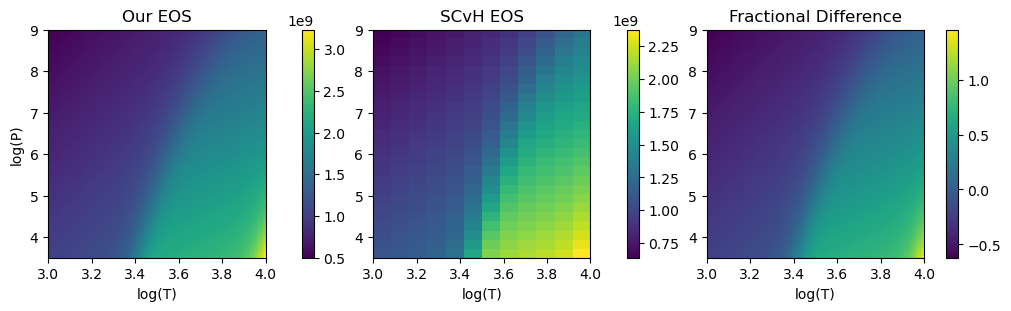

In [36]:
fig, axs = plt.subplot_mosaic([['Our EOS', 'SCvH EOS', 'Difference']], layout='constrained', figsize=(10, 3))

ax = axs['Our EOS']
cs = ax.imshow(tot_entropy, origin='lower', interpolation = 'nearest', extent=[3,4,3.5,9], aspect='auto')
clb = fig.colorbar(cs)
ax.set_xlabel('log(T)')
ax.set_ylabel('log(P)')
ax.set_title('Our EOS')

ax = axs['SCvH EOS']
cs = ax.imshow(SCvH, origin='lower', interpolation = 'nearest', extent=[3,4,3.5,9], aspect='auto')
clb = fig.colorbar(cs)
ax.set_xlabel('log(T)')
ax.set_title('SCvH EOS')

ax = axs['Difference']
cs = ax.imshow(diff, origin='lower', interpolation = 'nearest', extent=[3,4,3.5,9], aspect='auto')
clb = fig.colorbar(cs)
ax.set_xlabel('log(T)')
ax.set_title('Fractional Difference')

## QUESTION 2.7

<u>Computing adiabatic gradient for our T and P ranges</u>

In [37]:
dlogSdlogP, dlogSdlogT = np.gradient(np.log(tot_entropy), np.log(Pressure), np.log(Temp))   #computing the gradient using the np.gradient function:
                                                                                            #np.gradient takes a scalar array and computes the gradient across
                                                                                            #it's dimensions. In this case, because we have a 2D array, it'll 
                                                                                            #compute its gradient across the x and y axis, which is our 
                                                                                            #corresponding logT and logP. From this, we can get the dlogS/dlogP|T 
                                                                                            #and dlogS/dlogT|P

adiagrad = - dlogSdlogP / dlogSdlogT     #computing adiabatic gradient using the gradients with respect to logT and logP that we computed above


<u>Making matrix for SCvH's adiabatic gradient with respect to their T and P values</u>

In [63]:
SCvH_adgrad = np.full((len(unique_pressure), len(unique_temp)), np.nan)  #Make empty matrix for SCvH Adiabatic Grad for T and P restricted ranges

for i, P in enumerate(unique_pressure):
    for j, T in enumerate(unique_temp):
        row_S = rows.loc[(rows['log P'] == P) & (rows['log T'] == T)].iloc[0]     #grabbing the row for a given T and P value
        SCvH_adgrad[i, j] = -row_S['d log S/d log P|T'] * row_S['d log S/d log T|P'] ** (-1)      #calculating the adiabatic gradient at the T and P values and adding it to the SCvH Adiabatic Grad matrix
        

<u>Interpolating and calculating the difference between our adiabatic gradient and SCvH's adiabatic gradient</u>

In [70]:
dsdp = rows['d log S/d log P|T'][mask].values      #grabbing the dlogS/dlogP|T values within restricted ranges
dsdt = rows['d log S/d log T|P'][mask].values      #grabbing the dlogS/dlogT|P values within restricted ranges
values = -dsdp/dsdt     #calculating adiabatic gradient using the values grabbed above
SCvH_adgrinterp = griddata(points, values, (Tpt, Ppt), method = 'nearest') #interpolating values, can reuse the same points and meshgrid

addiff = (adiagrad - SCvH_adgrinterp)/SCvH_adgrinterp     #difference between our adiabatic gradient and SCvH adiabatic gradient

<u>Plotting exercise for adiabatic gradient</u>

Text(0.5, 1.0, 'Fractional Difference')

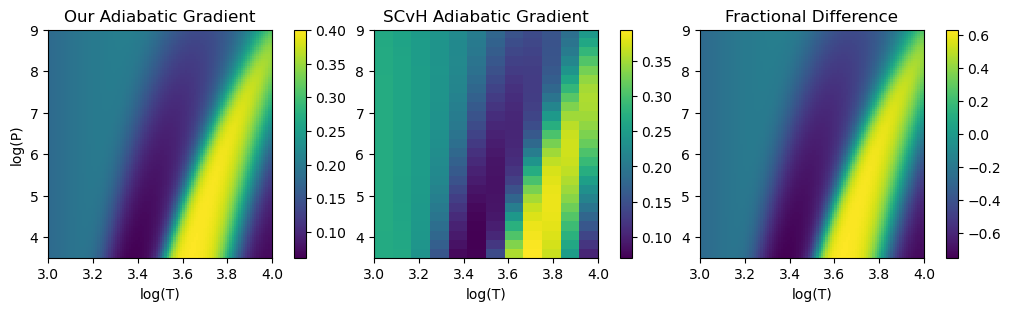

In [69]:
fig, axs = plt.subplot_mosaic([['Our Adiabatic Grad', 'SCvH Adiabatic Grad', 'Difference Adiabatic Grad']], layout='constrained', figsize=(10, 3))

ax = axs['Our Adiabatic Grad']
cs = ax.imshow(adiagrad, origin='lower', interpolation = 'nearest', extent=[3,4,3.5,9], aspect='auto')
clb = fig.colorbar(cs)
ax.set_xlabel('log(T)')
ax.set_ylabel('log(P)')
ax.set_title('Our Adiabatic Gradient')

ax = axs['SCvH Adiabatic Grad']
cs = ax.imshow(SCvH_adgrad, origin='lower', interpolation = 'nearest', extent=[3,4,3.5,9], aspect='auto')
clb = fig.colorbar(cs)
ax.set_xlabel('log(T)')
ax.set_title('SCvH Adiabatic Gradient')

ax = axs['Difference Adiabatic Grad']
cs = ax.imshow(addiff, origin='lower', interpolation = 'nearest', extent=[3,4,3.5,9], aspect='auto')
clb = fig.colorbar(cs)
ax.set_xlabel('log(T)')
ax.set_title('Fractional Difference')